In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
water_data = pd.read_csv('water_data_outlier_cleaned_without_ld_mg.csv')

# DATA INFORMATION

In [20]:
water_data.head()

,pH,Iron,Nitrate,Chloride,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Total Dissolved Solids,Target
0,8.332988,0.000083,8.605777,122.799772,3.434827,0,0.022683,0.607283,0.144599,1.626212,87.266538,3.708178,332.118789,0
1,6.917863,0.000081,3.734167,227.029851,1.245317,1,0.019007,0.622874,0.437835,1.686049,144.010981,3.292038,284.641984,0
2,5.443762,0.020106,3.816994,230.995630,0.528280,2,0.319956,0.423423,0.431588,3.414619,275.702107,3.560224,570.054094,0
3,8.091909,0.002167,9.925788,186.540872,3.807511,2,0.004867,0.222912,0.616574,0.795310,175.275175,3.177849,168.075545,0
4,NaN,0.000006,1.702584,162.828458,3.742464,3,0.504791,0.054562,0.851326,1.270483,40.853403,3.957842,365.639045,0


In [21]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724080 entries, 0 to 724079
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   pH                      710128 non-null  float64
 1   Iron                    718549 non-null  float64
 2   Nitrate                 711070 non-null  float64
 3   Chloride                702698 non-null  float64
 4   Zinc                    704933 non-null  float64
 5   Color                   724080 non-null  int64  
 6   Turbidity               717869 non-null  float64
 7   Fluoride                701049 non-null  float64
 8   Copper                  699571 non-null  float64
 9   Odor                    702644 non-null  float64
 10  Sulfate                 700104 non-null  float64
 11  Chlorine                717030 non-null  float64
 12  Total Dissolved Solids  723880 non-null  float64
 13  Target                  724080 non-null  int64  
dtypes: float64(12), int6

([<matplotlib.patches.Wedge at 0x17a9738e0>,
 [Text(-1.0375872715734165, 0.36525696963758775, 'Bad(0)'),
  Text(1.0375872459250448, -0.3652570424970352, 'Good(1)')],
 [Text(-0.5659566935854998, 0.19923107434777512, '89.226%'),
  Text(0.5659566795954789, -0.19923111408929192, '10.774%')])

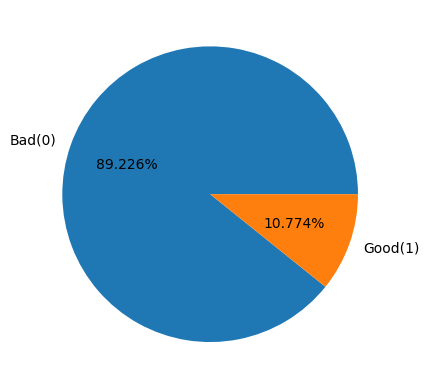

In [22]:
plt.pie(
    water_data['Target'].value_counts(),
    labels = ['Bad(0)','Good(1)'],
    autopct = "%1.3f%%",
)

# Filling Null Value

In [23]:
water_data.isna().sum()

pH                        13952
Iron                       5531
Nitrate                   13010
Chloride                  21382
Zinc                      19147
Color                         0
Turbidity                  6211
Fluoride                  23031
Copper                    24509
Odor                      21436
Sulfate                   23976
Chlorine                   7050
Total Dissolved Solids      200
Target                        0
dtype: int64

In [24]:
for column in water_data:
  mean_value = water_data[column].mean()
  water_data[column].fillna(mean_value, inplace = True)

/var/folders/_l/8qhtzvqj6m7_6t8xsrv7kc4c0000gn/T/ipykernel_6548/383890078.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  water_data[column].fillna(mean_value, inplace = True)


In [25]:
water_data.isna().sum()

pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Chlorine                  0
Total Dissolved Solids    0
Target                    0
dtype: int64

In [26]:
water_data.corr()['Target'].sort_values()

pH                       -0.030341
Zinc                      0.008613
Sulfate                   0.058741
Iron                      0.074890
Total Dissolved Solids    0.083334
Fluoride                  0.087812
Nitrate                   0.091920
Turbidity                 0.098613
Chlorine                  0.100830
Copper                    0.116539
Color                     0.118139
Chloride                  0.138443
Odor                      0.147459
Target                    1.000000
Name: Target, dtype: float64

In [30]:
X = water_data.drop('Target', axis = 1)
y = water_data['Target']

In [28]:
X.columns

Index(['pH', 'Iron', 'Nitrate', 'Chloride', 'Zinc', 'Color', 'Turbidity',
       'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Chlorine',
       'Total Dissolved Solids'],
      dtype='object')

In [29]:
X.corrwith(y).sort_values()

pH                       -0.030341
Zinc                      0.008613
Sulfate                   0.058741
Iron                      0.074890
Total Dissolved Solids    0.083334
Fluoride                  0.087812
Nitrate                   0.091920
Turbidity                 0.098613
Chlorine                  0.100830
Copper                    0.116539
Color                     0.118139
Chloride                  0.138443
Odor                      0.147459
dtype: float64

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, balanced_accuracy_score

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [37]:
y_train.value_counts()

Target
0    516854
1     62410
Name: count, dtype: int64

In [38]:
model = RandomForestClassifier()

In [39]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
y_pred = model.predict(X_test)

In [41]:
accuracy_score (y_test,y_pred)

0.9377831178875262

In [42]:
# F1 Score
f1 = f1_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Display the results
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")

F1 Score: 0.7467
Precision: 0.6651
Recall: 0.8509
Balanced Accuracy: 0.8996


•Precision Improvement: The improvement in precision indicates that the model is now more conservative in predicting positive cases, likely resulting in fewer false positives.

•Recall Decrease: The reduction in recall suggests that the model is missing more positive cases compared to when you used SMOTE and retained all features.

•Balanced Accuracy: The balanced accuracy remains strong, showing that the model is still effective in handling both classes, despite the changes.


# SMOTE

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smote = SMOTE(random_state = 42)

In [45]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [46]:
y_train_smote.value_counts()

Target
0    516854
1    516854
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x13f621030>,
 [Text(-1.1, 1.3471114790620887e-16, 'Bad(0)'),
  Text(1.1, -2.6942229581241775e-16, 'Good(1)')],
 [Text(-0.6, 7.347880794884119e-17, '50.000%'),
  Text(0.6, -1.4695761589768238e-16, '50.000%')])

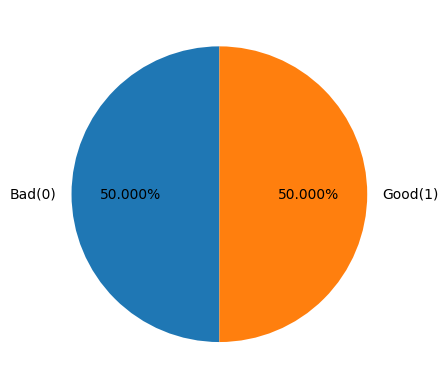

In [47]:
plt.pie(
    y_train_smote.value_counts(),
    labels = ['Bad(0)', 'Good(1)'],
    startangle=90,
    autopct = "%1.3f%%",
)

In [48]:
rf_model = RandomForestClassifier()

In [49]:
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [50]:
y_pred_smote = rf_model.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred_smote)

0.91265467904099

In [52]:
# F1 Score
f1 = f1_score(y_test, y_pred_smote)

# Precision
precision = precision_score(y_test, y_pred_smote)

# Recall
recall = recall_score(y_test, y_pred_smote)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_smote)

# Display the results
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")

F1 Score: 0.6875
Precision: 0.5594
Recall: 0.8919
Balanced Accuracy: 0.9035


•Lower Precision: The substantial drop in precision suggests that SMOTE, while helping to balance the class distribution, has led to an increase in false positives. The model is more inclusive in predicting the positive class, which may not be desirable if false positives are costly.

•High Recall: The recall remains high, indicating that the model is good at identifying the positive cases, which is expected after applying SMOTE to address class imbalance.

•Balanced Accuracy: The balanced accuracy suggests that, overall, the model is fairly well-calibrated in handling both classes, but the trade-off between precision and recall is evident.